In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import Image # show images

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, auc

In [23]:
data=pd.read_csv("parkinsons.data")

In [35]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [26]:
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [27]:
data.describe()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [13]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [28]:
data.duplicated().sum()

0

In [29]:
data["status"].value_counts()    

status
1    147
0     48
Name: count, dtype: int64

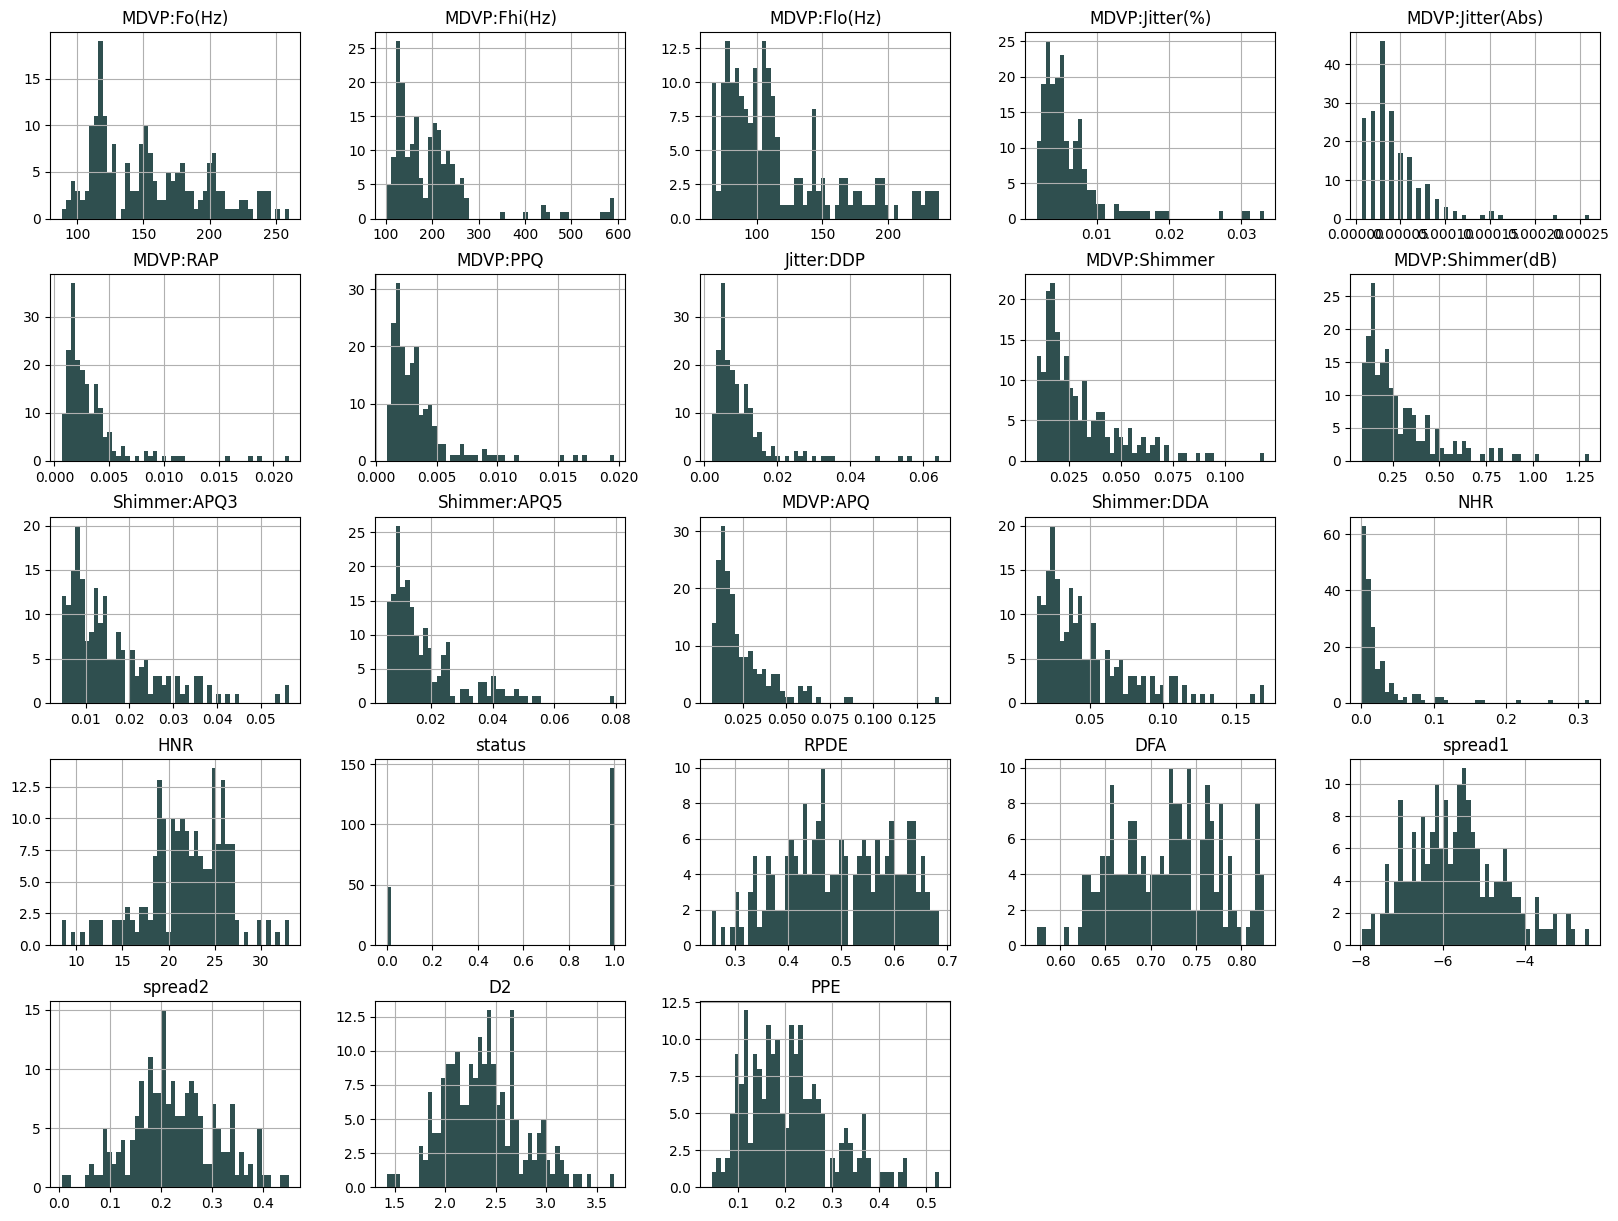

In [30]:
data.hist(bins=50, figsize =(20,15), color = 'darkslategrey')
plt.show(block=False)

The input features are scaled before showing their boxplots.

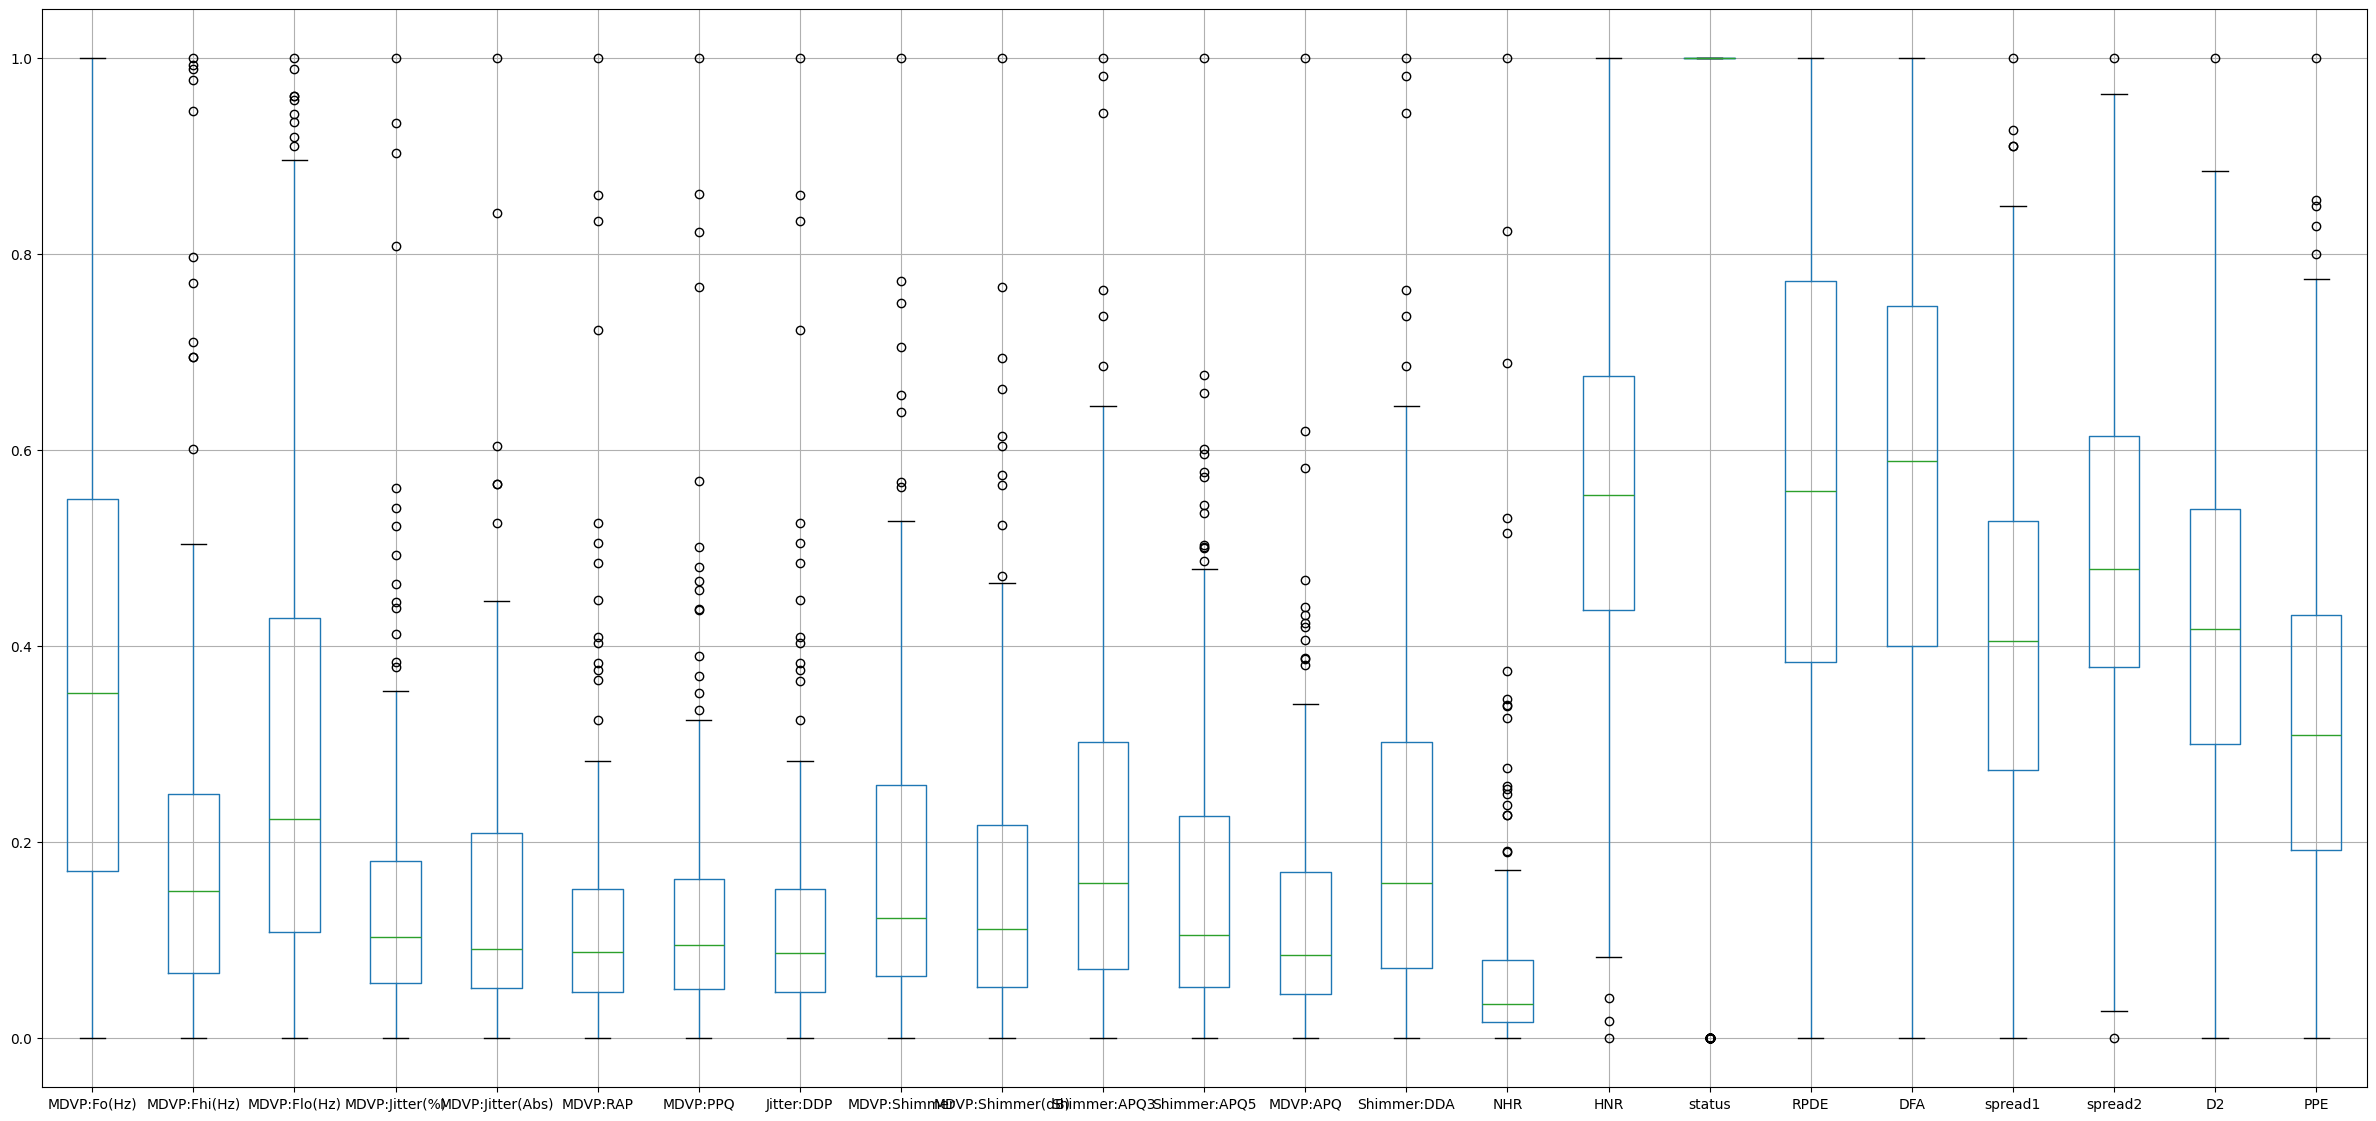

In [34]:
minmax = MinMaxScaler()
data_boxplot = data.drop(['name'],axis=1)
data_boxplot = minmax.fit_transform(data_boxplot)
boxplot = pd.DataFrame(data_boxplot, columns = data.drop(['name'],axis=1).columns)
boxplot.boxplot(figsize=(30,14))
plt.show(block=False)

-These points outside the whiskers are identified as outliers.

- Outliers are data points that fall outside the interquartile range (IQR) of the data and are often considered as extreme values. While outliers are commonly viewed as anomalies or errors, they can also represent real-world variability and provide valuable insights into the data.

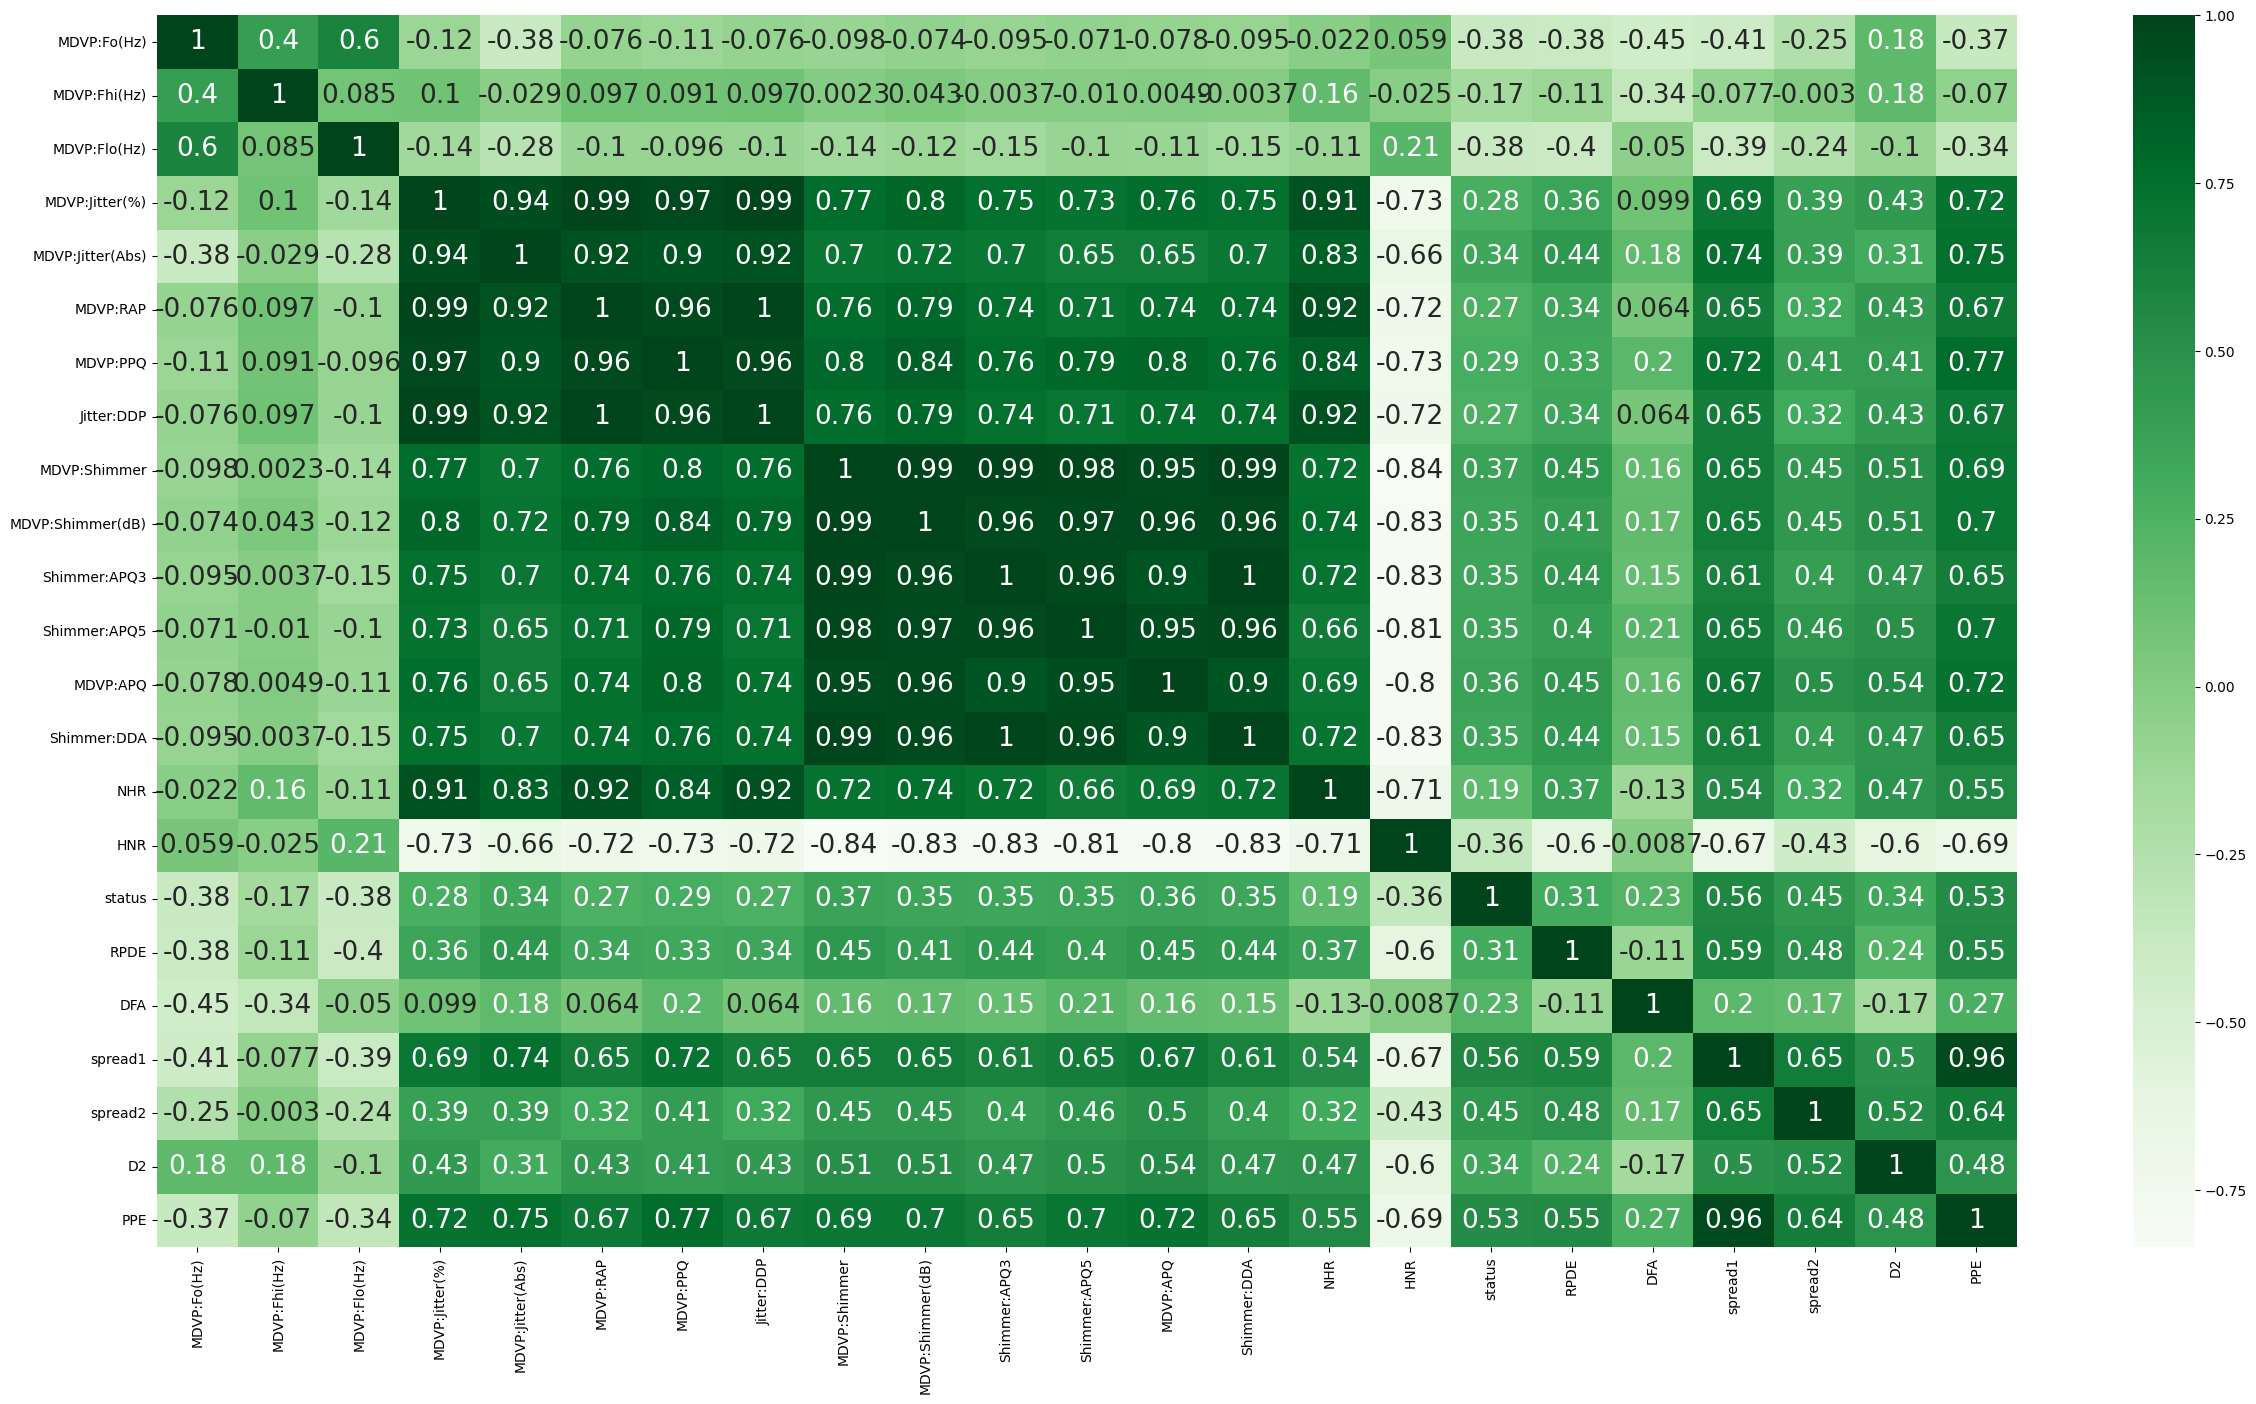

In [36]:
# Drop the 'name' column from your DataFrame
data_numeric = data.drop('name', axis=1)

# Now, re-calculate the correlation matrix and plot the heatmap
plt.figure(figsize=(30,16))
sns.heatmap(data_numeric.corr(), annot=True, cmap='Greens', annot_kws={'size':19})
plt.show()


/var/folders/1x/y786hcj51zz6j2jzjsth_kqh0000gn/T/ipykernel_94476/376120894.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.countplot(data, x='status', palette=['grey', 'maroon'], edgecolor='black', linewidth=3, alpha=0.9)


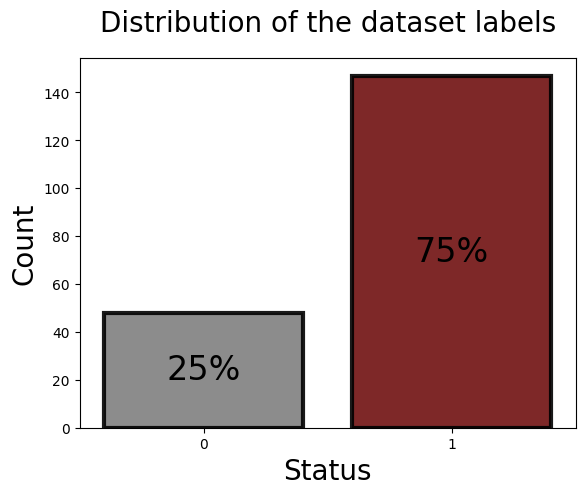

In [41]:
fig = sns.countplot(data, x='status', palette=['grey', 'maroon'], edgecolor='black', linewidth=3, alpha=0.9)

total = len(data['status'])

for p in fig.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    fig.annotate(percentage, (x, y), ha='center', va='center', color='Black', fontsize=24)
    
fig.set_xlabel('Status', fontsize=20)
fig.set_ylabel('Count', fontsize=20)

plt.title('Distribution of the dataset labels',y = 1.05, fontsize=20)
plt.show()

The data set is heaviliy unbalanced. First, it will be trained on this unbalanced Dataset

In [43]:
X=data.drop(['name','status'],axis=1)
y=data["status"]

Balancing the dataset

In [45]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
smote_data = pd.concat([X_smote, y_smote], axis=1)
smote_data.shape

(294, 23)

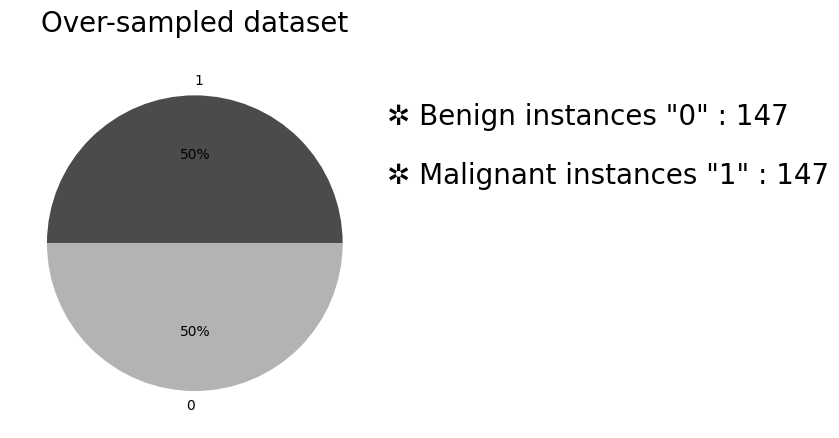

In [47]:
num_status=smote_data['status'].value_counts()
over_counts = num_status.values
plt.pie(num_status, labels=num_status.index.values, colors=[ (0.29296875,0.29296875,0.29296875), (0.703125,0.703125,0.703125)]
        , autopct='%d%%')
plt.title('Over-sampled dataset', y=1.05, fontsize=20, )
plt.text(x=1.3, y=0.8, s=f'✲ Benign instances "0" : {len(smote_data[smote_data.status==0].value_counts())}', fontsize=20)
plt.text(x=1.3, y=0.4, s=f'✲ Malignant instances "1" : {len(smote_data[smote_data.status==1].value_counts())}', fontsize=20)
plt.show(block=False)

--this is unbalanced version

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

--this is after Applying SMOTE Oversampling Technique :

In [49]:
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote,
                                                                            train_size=0.8, random_state=42)

Now the data set will be normalized

This is the formula used for normalizing

𝑀𝑖𝑛𝑀𝑎𝑥(𝑋)=𝑥_𝑖−𝑥_𝑚𝑖𝑛/𝑥_𝑚𝑎𝑥−𝑥_𝑚𝑖𝑛

where X is a particular feature represented by a column in the dataset, xi is a value of this column where i is the number of elements in the column. The minimum value of the column is represented as Xmin and the maximum value of the column is  𝑋𝑚

--Now normalizing the unbalanced data first

In [52]:
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

--normalizing balanced oversampled data

In [54]:
X_smote_train_scaled = minmax.fit_transform(X_smote_train)
X_smote_test_scaled = minmax.transform(X_smote_test)

__Modeling__

In [60]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) : 
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(colored(" ❖ Testing Accuracy Score : ", attrs=['bold']),
          colored(f"{round(accuracy_score(Ytest, Ypredicted) * 100,2)}", color='black', attrs=['bold']))
    print(' • Precision Score is :', round(precision_score(Ytest, Ypredicted) * 100,2))
    print(' • Recall Score is :', round(recall_score(Ytest, Ypredicted) * 100,2))
    print(' • F1-Score Score is :', round(f1_score(Ytest, Ypredicted) * 100,2))
    print('-'*80)
    conf_matrix = confusion_matrix(Ytest,Ypredicted)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, annot_kws={"size": 16})
    plt.title('Predicted Labels',y = 1.05, fontsize=20, fontfamily='Times New Roman')
    plt.ylabel('True Labels', labelpad=25, fontsize=20, fontfamily='Times New Roman')
    plt.show()
    print('-'*80)

__First it will be modeled and trained on unbalanced data set to asses the performance__

Logestic regression

--------------------------------------------------------------------------------
Logistic Regression :
----------------

 • Training Accuracy Score :  85.26
 • Cross Validation Score : 83.87
 ❖ Testing Accuracy Score :  89.74
 • Precision Score is : 88.89
 • Recall Score is : 100.0
 • F1-Score Score is : 94.12
--------------------------------------------------------------------------------


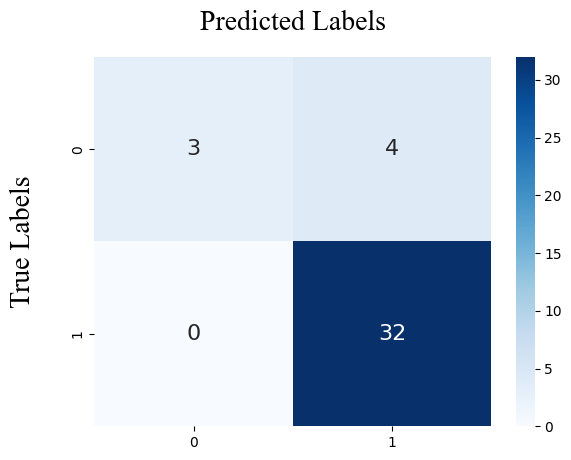

--------------------------------------------------------------------------------


In [62]:
LR = LogisticRegression()
LR.fit(X_train_scaled,y_train)
y_pred_LR = LR.predict(X_test_scaled)
print('-'*80)
print("Logistic Regression :")
print("-"*16)
Evaluate_Performance(LR, X_train_scaled, X_test_scaled, y_train, y_test)

support vector

--------------------------------------------------------------------------------
Support Vector Machine:
----------------

 • Training Accuracy Score :  88.46
 • Cross Validation Score : 87.67
 ❖ Testing Accuracy Score :  89.74
 • Precision Score is : 88.89
 • Recall Score is : 100.0
 • F1-Score Score is : 94.12
--------------------------------------------------------------------------------


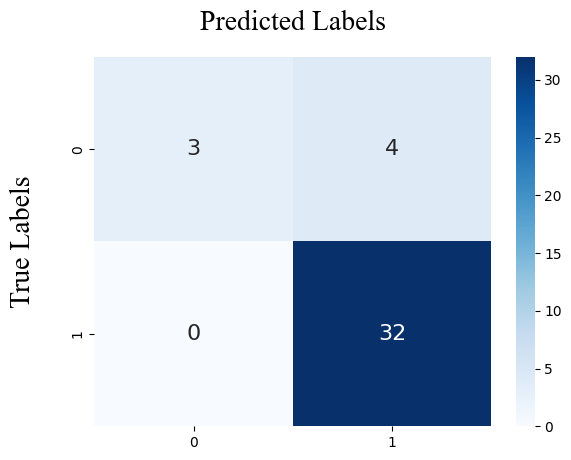

--------------------------------------------------------------------------------


In [64]:
SVM = SVC(probability=True, kernel = 'linear')
SVM.fit(X_train_scaled,y_train)
y_pred_SVM = SVM.predict(X_test_scaled)
print('-'*80)
print("Support Vector Machine:")
print("-"*16)
Evaluate_Performance(SVM, X_train_scaled, X_test_scaled, y_train, y_test)

decision tree

--------------------------------------------------------------------------------
Decision Tree Classifier :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 88.5
 ❖ Testing Accuracy Score :  92.31
 • Precision Score is : 93.94
 • Recall Score is : 96.88
 • F1-Score Score is : 95.38
--------------------------------------------------------------------------------


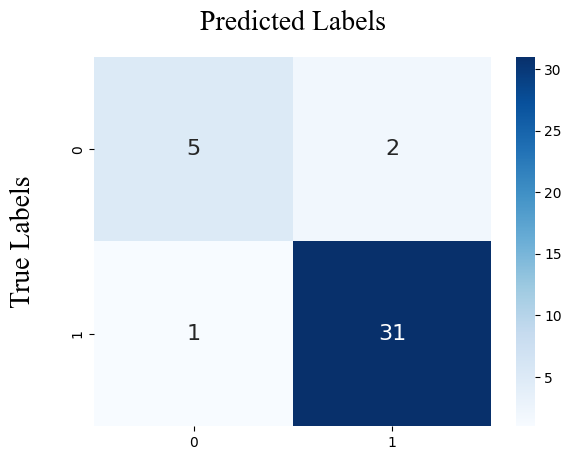

--------------------------------------------------------------------------------


DECISION TREE :


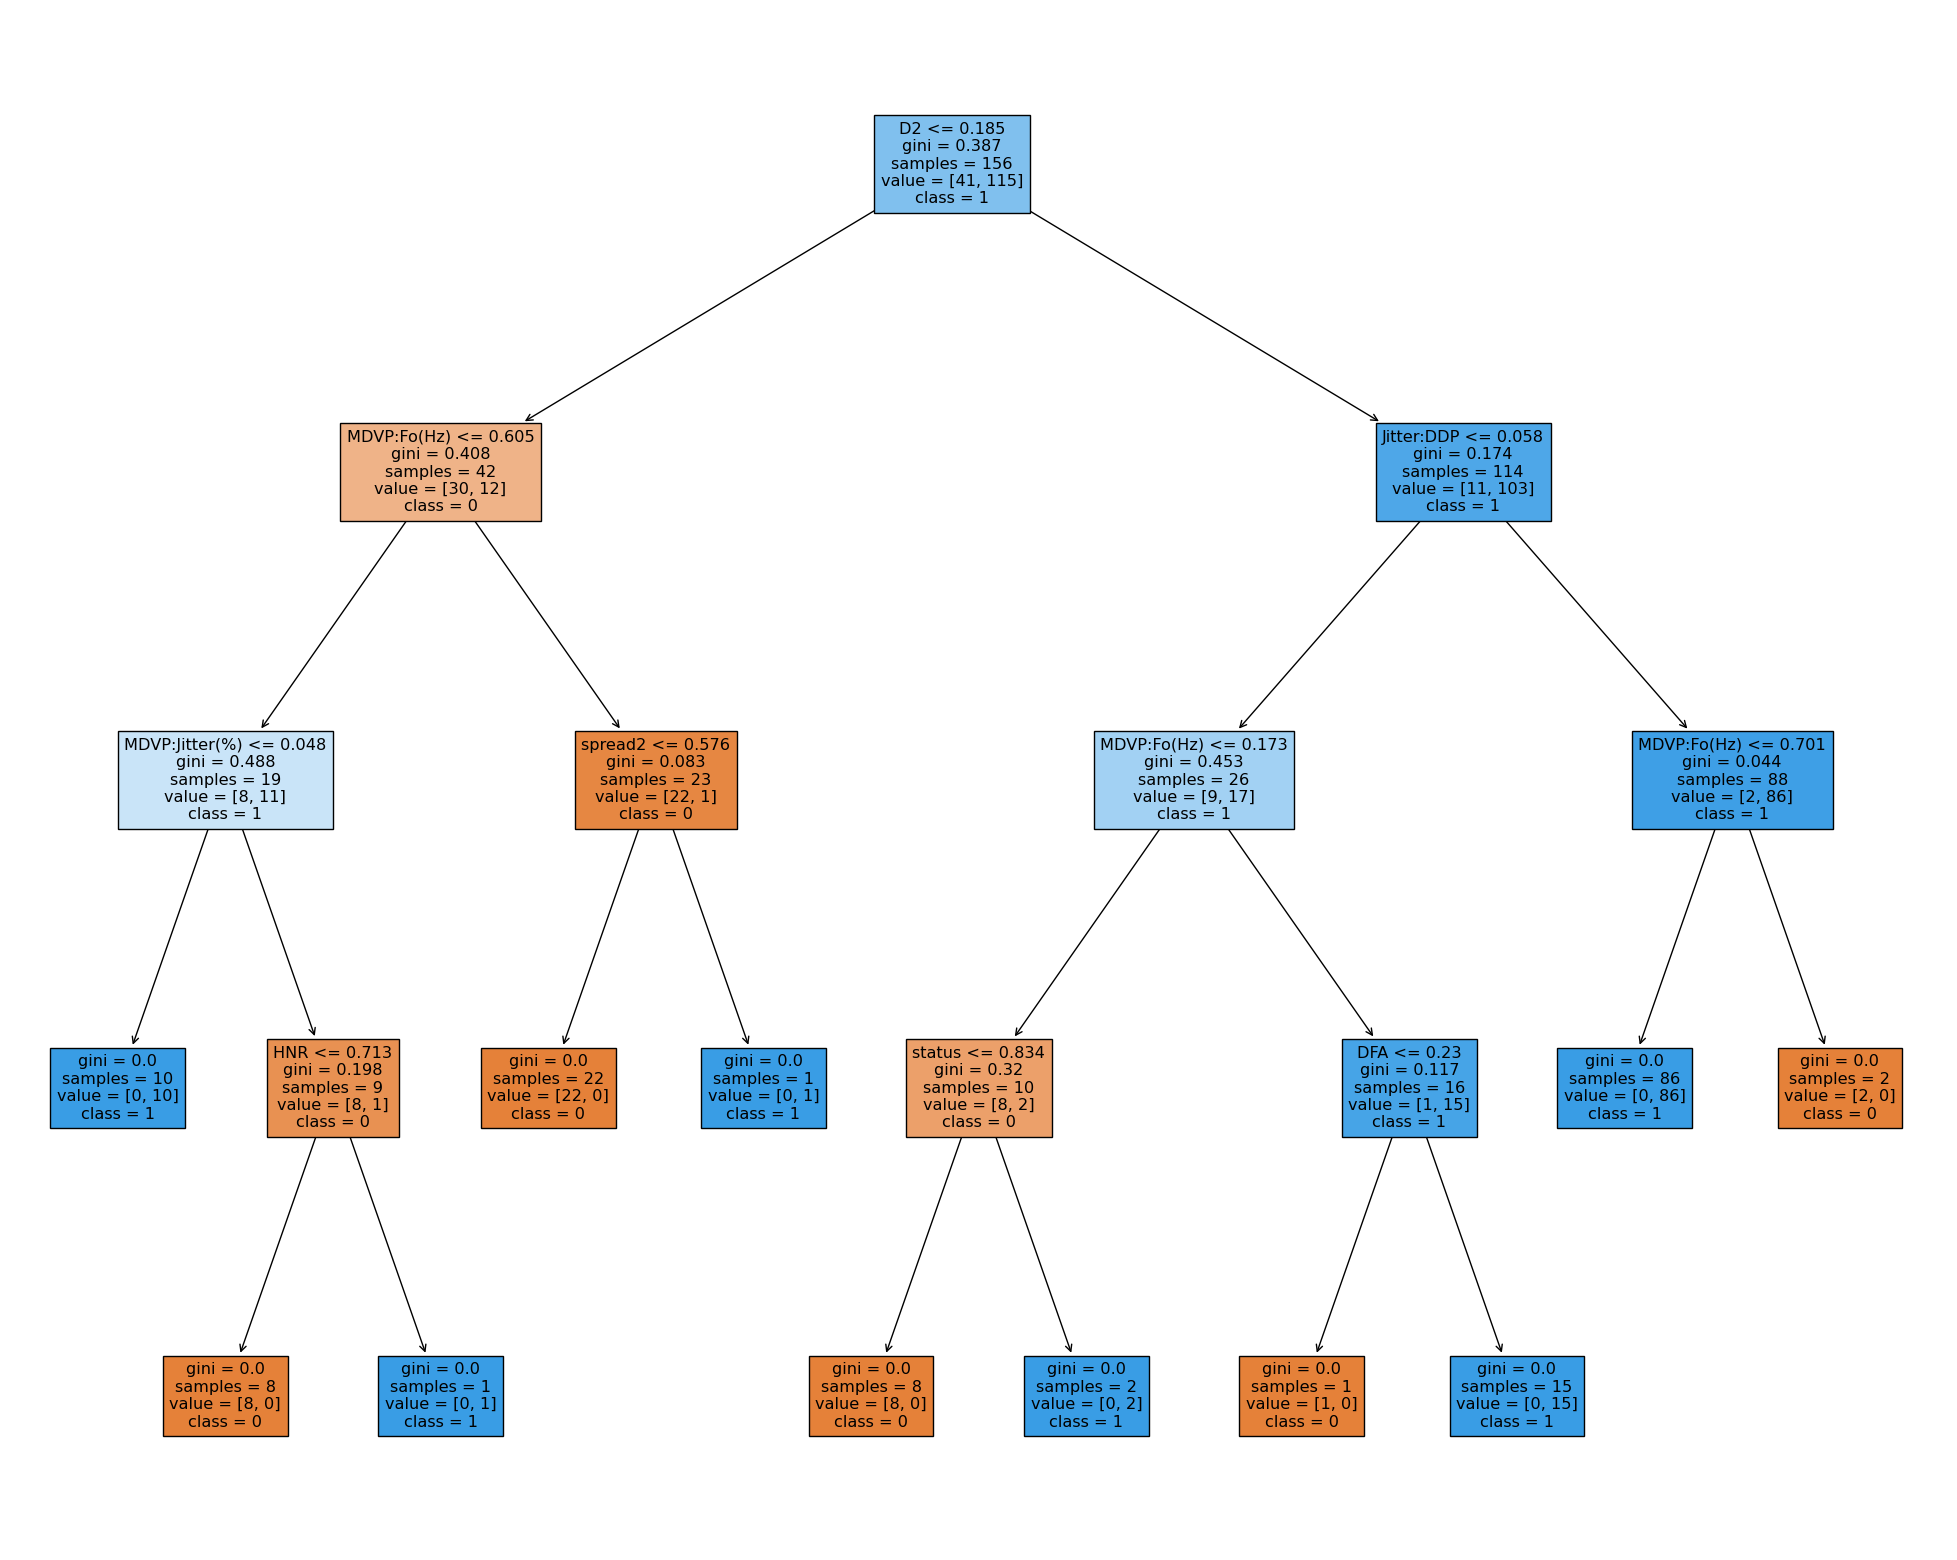

In [65]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train_scaled, y_train)
y_pred_DTC = DTC.predict(X_test_scaled)
print('-'*80)
print('Decision Tree Classifier :')
print("-"*16)
Evaluate_Performance(DTC, X_train_scaled, X_test_scaled, y_train, y_test)
print('\n')
print("DECISION TREE :")
fig = plt.figure(figsize=(25,20))
tree = plot_tree(DTC, feature_names = [ c for c in data.drop(['name'],axis=1).columns], class_names=['0','1'], filled=True)

random forest classifer

--------------------------------------------------------------------------------
Random Forest Classifier
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 90.92
 ❖ Testing Accuracy Score :  94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
--------------------------------------------------------------------------------


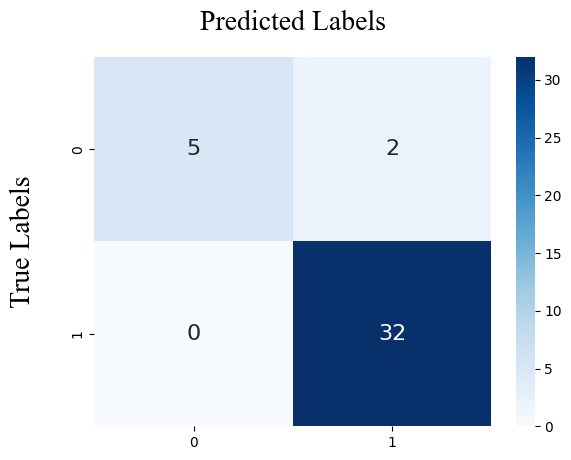

--------------------------------------------------------------------------------


In [66]:
RFC=RandomForestClassifier(n_estimators=150)
RFC.fit(X_train_scaled, y_train)
y_pred_RFC = RFC.predict(X_test_scaled)
print('-'*80)
print('Random Forest Classifier')
print("-"*16)
Evaluate_Performance(RFC, X_train_scaled, X_test_scaled, y_train, y_test)

key nearest neighbor

--------------------------------------------------------------------------------
Key- Nearest Neighbor :
----------------

 • Training Accuracy Score :  96.79
 • Cross Validation Score : 89.79
 ❖ Testing Accuracy Score :  94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
--------------------------------------------------------------------------------


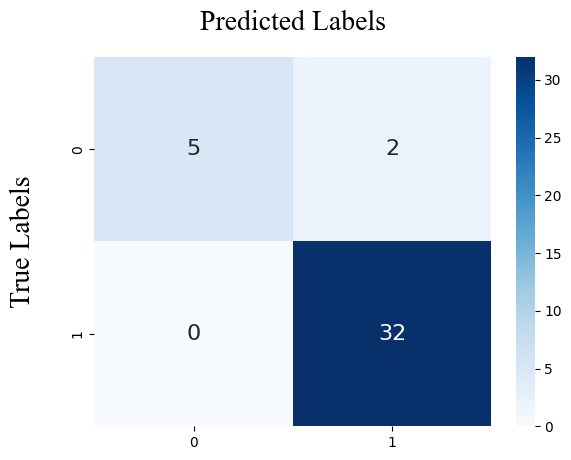

--------------------------------------------------------------------------------


In [67]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
y_pred_KNN = KNN.predict(X_test_scaled)
print('-'*80)
print("Key- Nearest Neighbor :")
print("-"*16)
Evaluate_Performance(KNN, X_train_scaled, X_test_scaled, y_train, y_test)

In [68]:
first_scenario_results = [
    {'Model': 'Logistic Regression', 'Precision': precision_score(y_test, y_pred_LR) , 'Recall': recall_score(y_test, y_pred_LR) ,
     'F1-Score': f1_score(y_test, y_pred_LR) , 'Accuracy': accuracy_score(y_test, y_pred_LR)},
    
    {'Model': 'Support Vector Machine(linear)', 'Precision': precision_score(y_test, y_pred_SVM), 'Recall': recall_score(y_test, y_pred_SVM),
     'F1-Score': f1_score(y_test, y_pred_SVM), 'Accuracy': accuracy_score(y_test, y_pred_SVM)},
    
    {'Model': 'Decision Tree', 'Precision': precision_score(y_test, y_pred_DTC), 'Recall': recall_score(y_test, y_pred_DTC),
     'F1-Score': f1_score(y_test, y_pred_DTC), 'Accuracy': accuracy_score(y_test, y_pred_DTC)},
    
    {'Model': 'Random Forest', 'Precision': precision_score(y_test, y_pred_RFC), 'Recall': recall_score(y_test, y_pred_RFC),
     'F1-Score': f1_score(y_test, y_pred_RFC), 'Accuracy': accuracy_score(y_test, y_pred_RFC)}, 

    {'Model': 'K-Nearest Neighbor', 'Precision': precision_score(y_test, y_pred_KNN), 'Recall': recall_score(y_test, y_pred_KNN),
     'F1-Score': f1_score(y_test, y_pred_KNN), 'Accuracy': accuracy_score(y_test, y_pred_KNN)},
    
]
first_scenario_results = pd.DataFrame(first_scenario_results).style.set_properties(**{'font-weight': 'bold'}, subset=pd.IndexSlice[[3,4], :])
print("Results without balancing the dataset : ")
print('-'*70)
first_scenario_results

Results without balancing the dataset : 
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.888889,1.000000,0.941176,0.897436
1,Support Vector Machine(linear),0.888889,1.000000,0.941176,0.897436
2,Decision Tree,0.939394,0.968750,0.953846,0.923077
3,Random Forest,0.941176,1.000000,0.969697,0.948718
4,K-Nearest Neighbor,0.941176,1.000000,0.969697,0.948718


Now models will be trained on the balanced dataset

--------------------------------------------------------------------------------
Logistic Regression :
----------------

 • Training Accuracy Score :  79.57
 • Cross Validation Score : 77.46
 ❖ Testing Accuracy Score :  84.75
 • Precision Score is : 85.71
 • Recall Score is : 82.76
 • F1-Score Score is : 84.21
--------------------------------------------------------------------------------


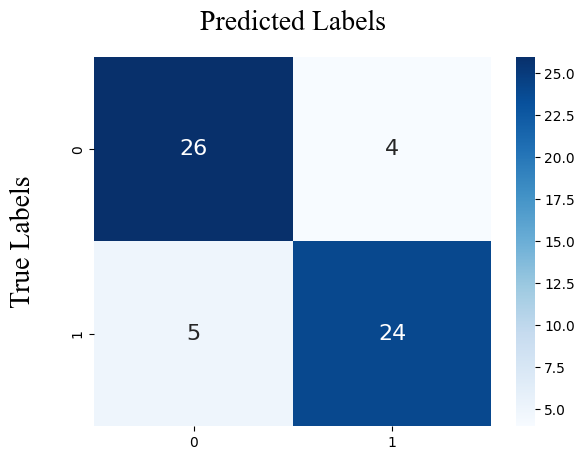

--------------------------------------------------------------------------------


In [70]:
LR.fit(X_smote_train_scaled,y_smote_train)
y_pred_LR_smote = LR.predict(X_smote_test_scaled)
print('-'*80)
print("Logistic Regression :")
print("-"*16)
Evaluate_Performance(LR, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

support vector machine 

--------------------------------------------------------------------------------
Support vector machine :
----------------

 • Training Accuracy Score :  83.4
 • Cross Validation Score : 79.22
 ❖ Testing Accuracy Score :  88.14
 • Precision Score is : 89.29
 • Recall Score is : 86.21
 • F1-Score Score is : 87.72
--------------------------------------------------------------------------------


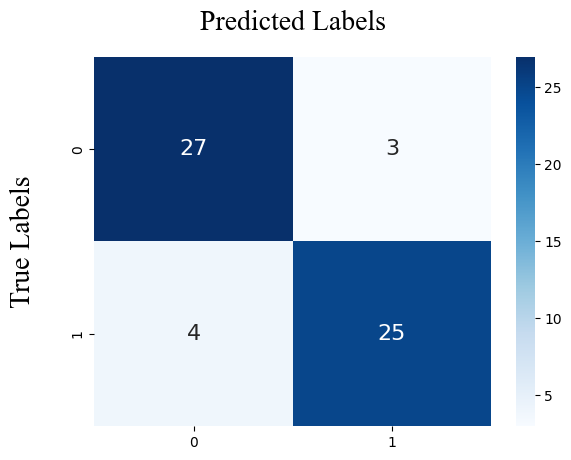

--------------------------------------------------------------------------------


In [71]:
SVM.fit(X_smote_train_scaled,y_smote_train)
y_pred_SVM_smote = SVM.predict(X_smote_test_scaled)
print('-'*80)
print("Support vector machine :")
print("-"*16)
Evaluate_Performance(SVM, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

decision tree

--------------------------------------------------------------------------------
Decision Tree Classifier :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 91.03
 ❖ Testing Accuracy Score :  94.92
 • Precision Score is : 93.33
 • Recall Score is : 96.55
 • F1-Score Score is : 94.92
--------------------------------------------------------------------------------


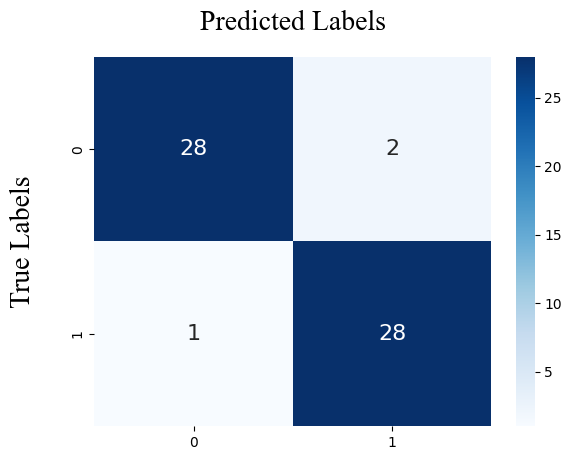

--------------------------------------------------------------------------------
--> Tree's Depth :  6 

DECISION TREE :


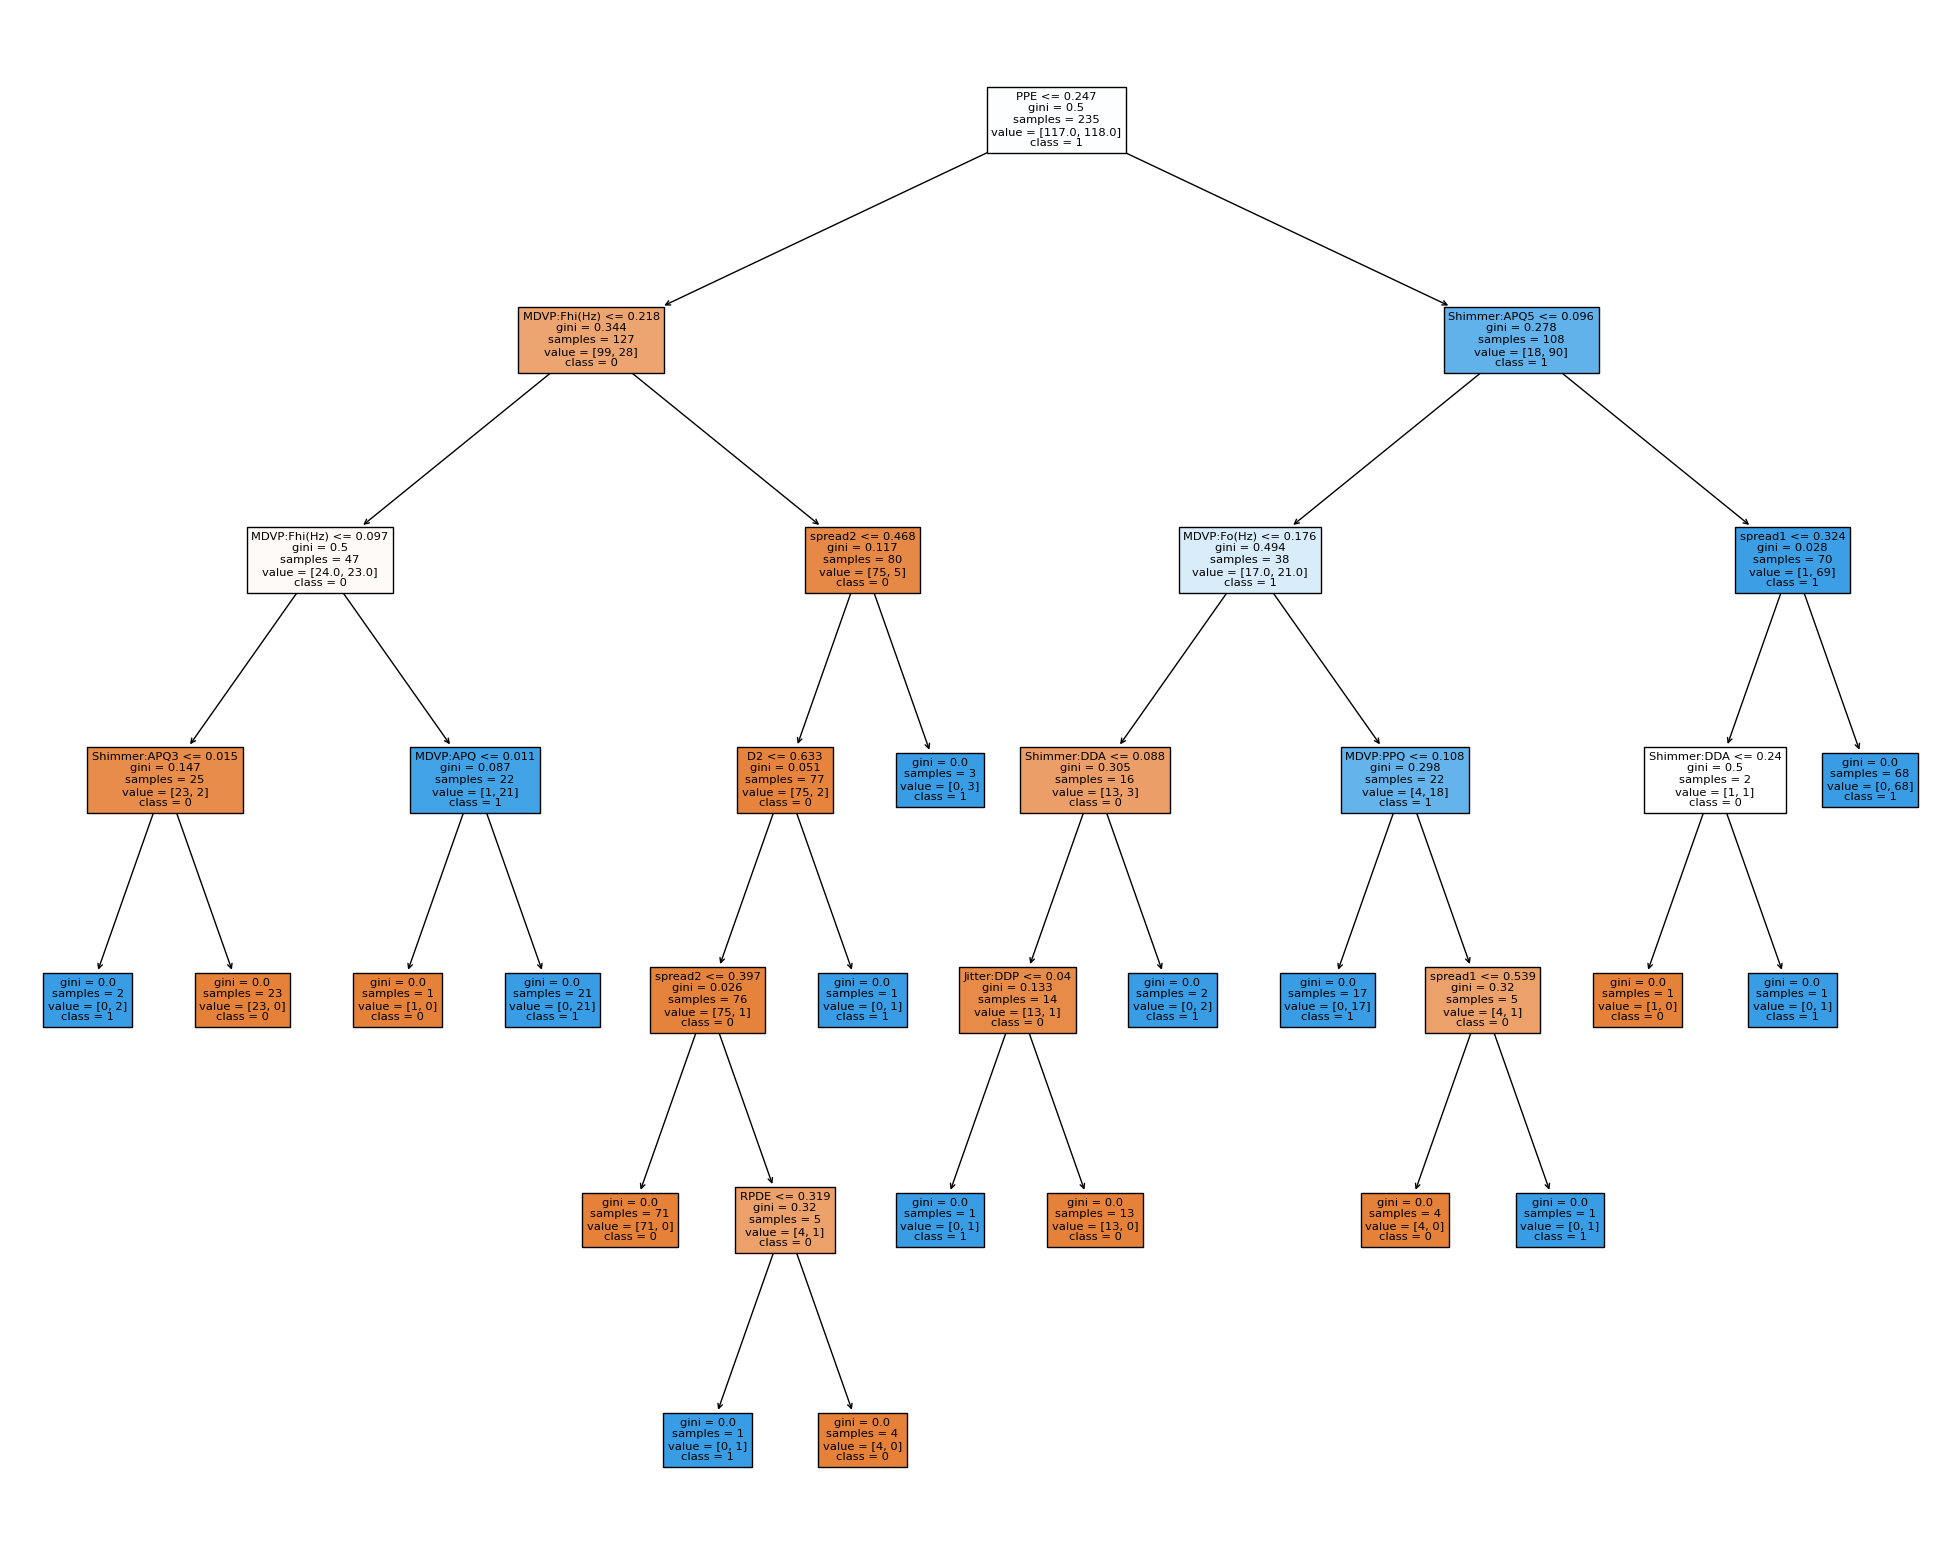

In [74]:
DTC = DecisionTreeClassifier()
DTC.fit(X_smote_train_scaled,y_smote_train)
y_pred_DTC_smote = DTC.predict(X_smote_test_scaled)
print('-'*80)
print("Decision Tree Classifier :")
print("-"*16)
Evaluate_Performance(DTC, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)
print( '--> Tree\'s Depth : ',DTC.tree_.max_depth,'\n')
print("DECISION TREE :")
fig = plt.figure(figsize=(25,20))
tree = plot_tree(DTC, feature_names = [ c for c in smote_data.columns], class_names=['0','1'], filled=True)
plt.show()

random forest classifer

--------------------------------------------------------------------------------
Random Forest Classifier :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 92.75
 ❖ Testing Accuracy Score :  100.0
 • Precision Score is : 100.0
 • Recall Score is : 100.0
 • F1-Score Score is : 100.0
--------------------------------------------------------------------------------


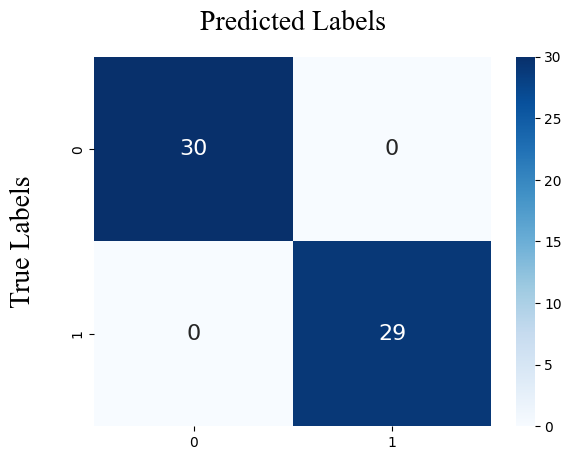

--------------------------------------------------------------------------------


In [77]:
RFC.fit(X_smote_train_scaled,y_smote_train)
y_pred_RFC_smote = RFC.predict(X_smote_test_scaled)
print('-'*80)
print("Random Forest Classifier :")
print("-"*16)
Evaluate_Performance(RFC, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

key nearest naeighbor

--------------------------------------------------------------------------------
Key- Nearest Neighbor :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 96.2
 ❖ Testing Accuracy Score :  98.31
 • Precision Score is : 100.0
 • Recall Score is : 96.55
 • F1-Score Score is : 98.25
--------------------------------------------------------------------------------


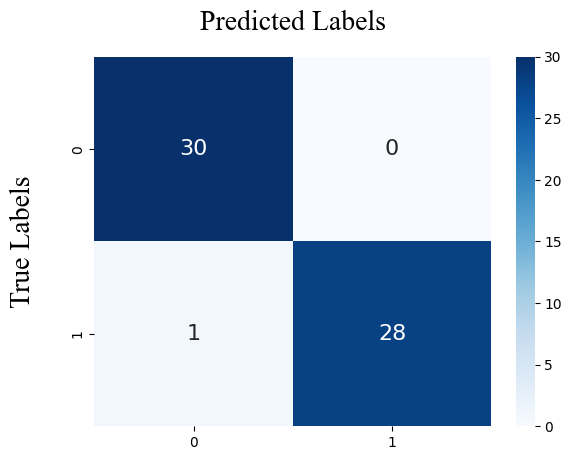

--------------------------------------------------------------------------------


In [84]:
import pickle
KNN = KNeighborsClassifier( n_neighbors = 1 ) 
KNN.fit(X_smote_train_scaled,y_smote_train)
y_pred_KNN_smote = KNN.predict(X_smote_test_scaled)
print('-'*80)
print("Key- Nearest Neighbor :")
print("-"*16)
Evaluate_Performance(KNN, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)
with open("parkinson.pkl", 'wb') as file:
    pickle.dump(KNN, file)

In [79]:
results = [
    {'Model': 'Logistic Regression', 'Precision': precision_score(y_smote_test, y_pred_LR_smote) , 'Recall': recall_score(y_smote_test, y_pred_LR_smote) ,
     'F1-Score': f1_score(y_smote_test, y_pred_LR_smote) ,'Training Accuracy': LR.score(X_smote_train_scaled, y_smote_train), 'Test Accuracy': accuracy_score(y_smote_test, y_pred_LR_smote)},
    
    {'Model': 'Support Vector Machine(rbf)', 'Precision': precision_score(y_smote_test, y_pred_SVM_smote), 'Recall': recall_score(y_smote_test, y_pred_SVM_smote),
     'F1-Score': f1_score(y_smote_test, y_pred_SVM_smote),'Training Accuracy': SVM.score(X_smote_train_scaled, y_smote_train), 'Test Accuracy': accuracy_score(y_smote_test, y_pred_SVM_smote)},
    
    {'Model': 'Decision Tree', 'Precision': precision_score(y_smote_test, y_pred_DTC_smote), 'Recall': recall_score(y_smote_test, y_pred_DTC_smote),
     'F1-Score': f1_score(y_smote_test, y_pred_DTC_smote),'Training Accuracy': DTC.score(X_smote_train_scaled, y_smote_train), 'Test Accuracy': accuracy_score(y_smote_test, y_pred_DTC_smote)},
    
    {'Model': 'Random Forest', 'Precision': precision_score(y_smote_test, y_pred_RFC_smote), 'Recall': recall_score(y_smote_test, y_pred_RFC_smote),
     'F1-Score': f1_score(y_smote_test, y_pred_RFC_smote),'Training Accuracy': RFC.score(X_smote_train_scaled, y_smote_train), 'Test Accuracy': accuracy_score(y_smote_test, y_pred_RFC_smote)},
    
    {'Model': 'K-Nearest Neighbor', 'Precision': precision_score(y_smote_test, y_pred_KNN_smote), 'Recall': recall_score(y_smote_test, y_pred_KNN_smote),
     'F1-Score': f1_score(y_smote_test, y_pred_KNN_smote),'Training Accuracy': KNN.score(X_smote_train_scaled, y_smote_train), 'Test Accuracy': accuracy_score(y_smote_test, y_pred_KNN_smote)},
]
smote_results = pd.DataFrame(results).style.set_properties(**{'font-weight': 'bold'}, subset=pd.IndexSlice[[4], :])
print("Results after balancing the dataset using SMOTE Over Sampler technique : ")
print('-'*70)
smote_results

Results after balancing the dataset using SMOTE Over Sampler technique : 
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Training Accuracy,Test Accuracy
0,Logistic Regression,0.857143,0.827586,0.842105,0.795745,0.847458
1,Support Vector Machine(rbf),0.892857,0.862069,0.877193,0.834043,0.881356
2,Decision Tree,0.966667,1.000000,0.983051,1.000000,0.983051
3,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
4,K-Nearest Neighbor,1.000000,0.965517,0.982456,1.000000,0.983051


Applying the SMOTE technique to balance the class distribution in our dataset, and found that this approach improved the performance of our machine learning models. Specifically, the SMOTE technique helped to reduce the bias towards the majority class and improve the accuracy of the minority class predictions, resulting in a more balanced and accurate model overall.

✲ While achieving 100% accuracy on both the training and testing sets may seem like an ideal scenario, it is not always the best indicator of model performance. In fact, achieving perfect accuracy on both sets can sometimes be a sign of overfitting, where the model has simply memorized the training data and may not generalize well to new, unseen data. In contrast, a model with high accuracy on the training set but slightly lower accuracy on the testing set may indicate better generalization to new data. This is because the model has learned to identify patterns in the training data that are also present in the testing data, rather than simply memorizing the training set.

__So in conclusion, while random forest algorithm have an accuracy rate of 100%, due to the nature of this system, k-nearest nneighbor model will be used as the final model.__


In [ ]:
with open("parkinson.pkl", 'wb') as file:
    pickle.dump(model, file)